<a href="https://colab.research.google.com/github/JaswanthNekkalapu/Jaswanth/blob/main/Stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import warnings 00 0 0  0 000000000000000 bvbv bb n m0.03
#warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [7]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [8]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


In [9]:
dataset_train = train_data.Open.values
dataset_train.shape
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1184, 1)

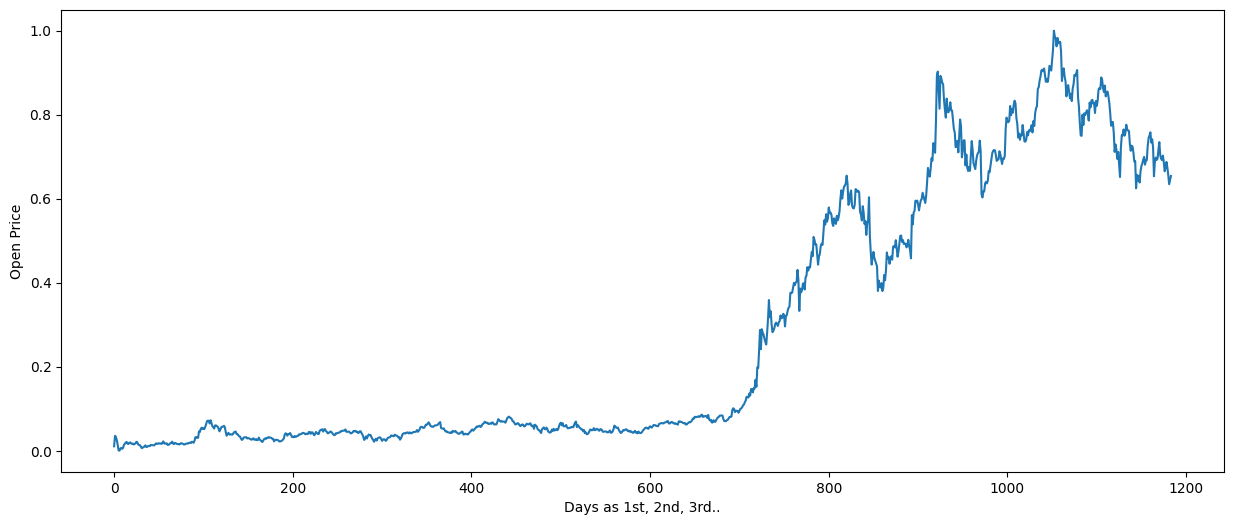

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()


In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


In [13]:
#Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


In [14]:
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

In [15]:
y_train[0]

array([0.01789858])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
    )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )
# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
)
    # adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.0013 - loss: 0.5022
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.0000e+00 - loss: 0.2299
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.0000e+00 - loss: 0.1539
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 9.2906e-04 - loss: 0.1010
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 9.6639e-05 - loss: 0.0792
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 9.6639e-05 - loss: 0.0590
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 4.7117e-04 - loss: 0.0468
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.0000e+00 - loss: 0.0404
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 5.5361e-04 - loss: 0.0374
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.0014 - loss: 0.0339
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 6.4499e-04 - loss: 0.0282
Epoch 12/50
36/36 ━━━━━━━━━

In [18]:
# Losses
history.history["loss"]

[0.381597101688385,
 0.1998409628868103,
 0.13638293743133545,
 0.09863002598285675,
 0.07066015899181366,
 0.05317554622888565,
 0.04481872171163559,
 0.03904120996594429,
 0.03523276746273041,
 0.030164984986186028,
 0.02739066444337368,
 0.02320779301226139,
 0.02129366621375084,
 0.021279407665133476,
 0.01923552341759205,
 0.017374200746417046,
 0.017430147156119347,
 0.0166885107755661,
 0.014370106160640717,
 0.01347167044878006,
 0.01294504851102829,
 0.012388034723699093,
 0.012317911721765995,
 0.010899289511144161,
 0.010661660693585873,
 0.008852462284266949,
 0.009045170620083809,
 0.007897132076323032,
 0.00832628458738327,
 0.00743299163877964,
 0.007287842221558094,
 0.0069464729167521,
 0.00773962726816535,
 0.006457660347223282,
 0.006927318871021271,
 0.006165030878037214,
 0.005324128083884716,
 0.005366868805140257,
 0.005486655049026012,
 0.005445713177323341,
 0.005261531099677086,
 0.004992762114852667,
 0.004252913873642683,
 0.004675493575632572,
 0.0042416886

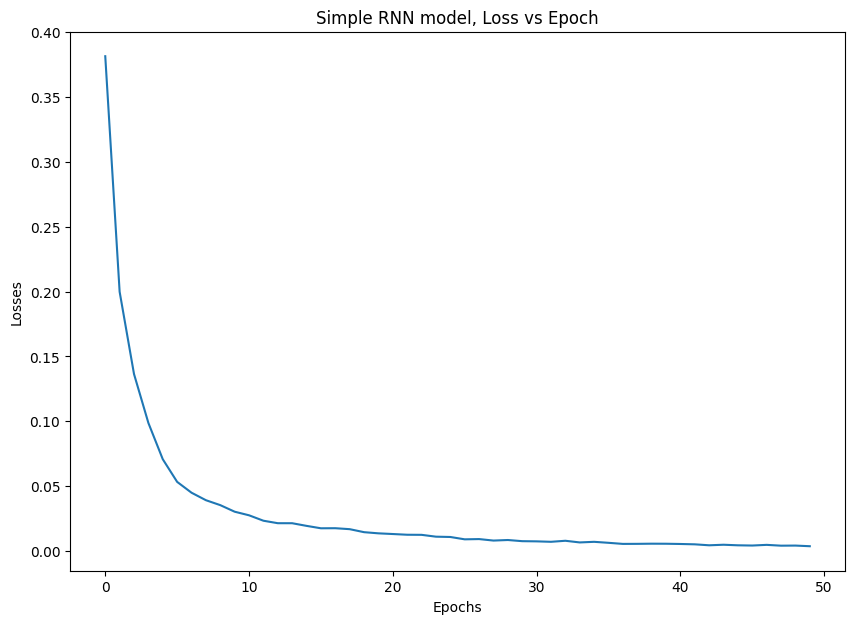

In [19]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

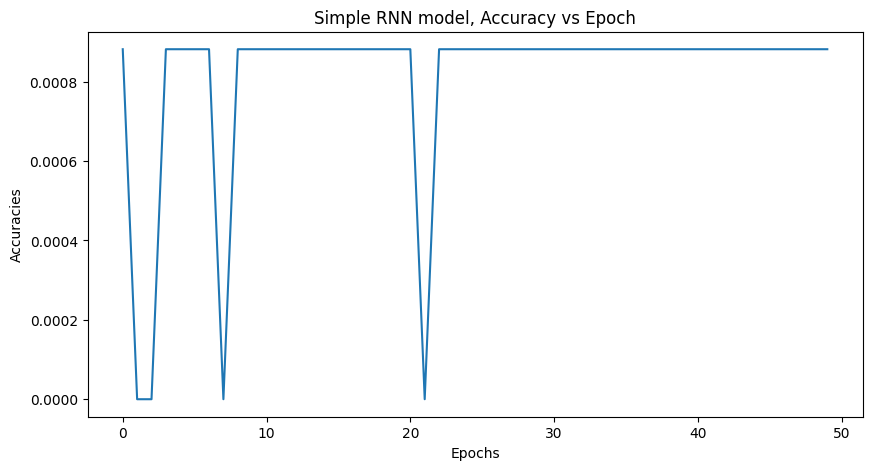

In [20]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [21]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape
(1134, 1)
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


(1134, 1)

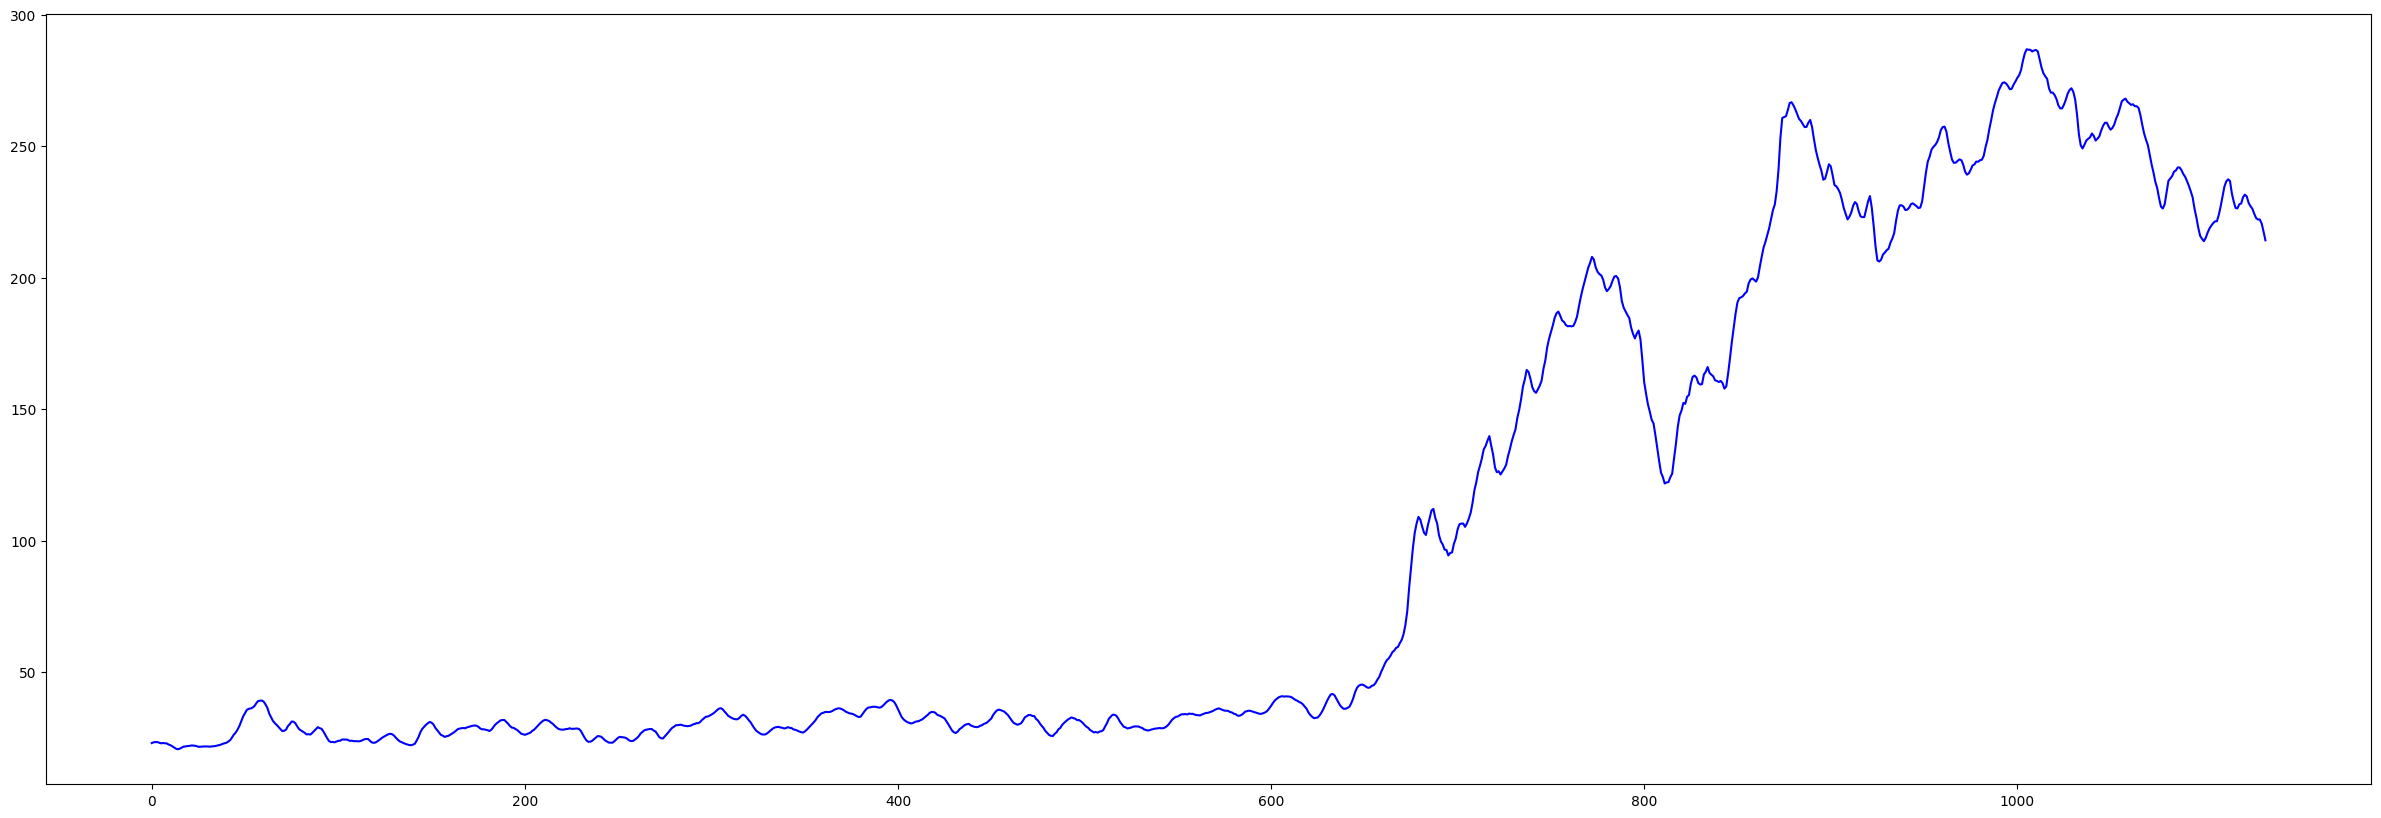

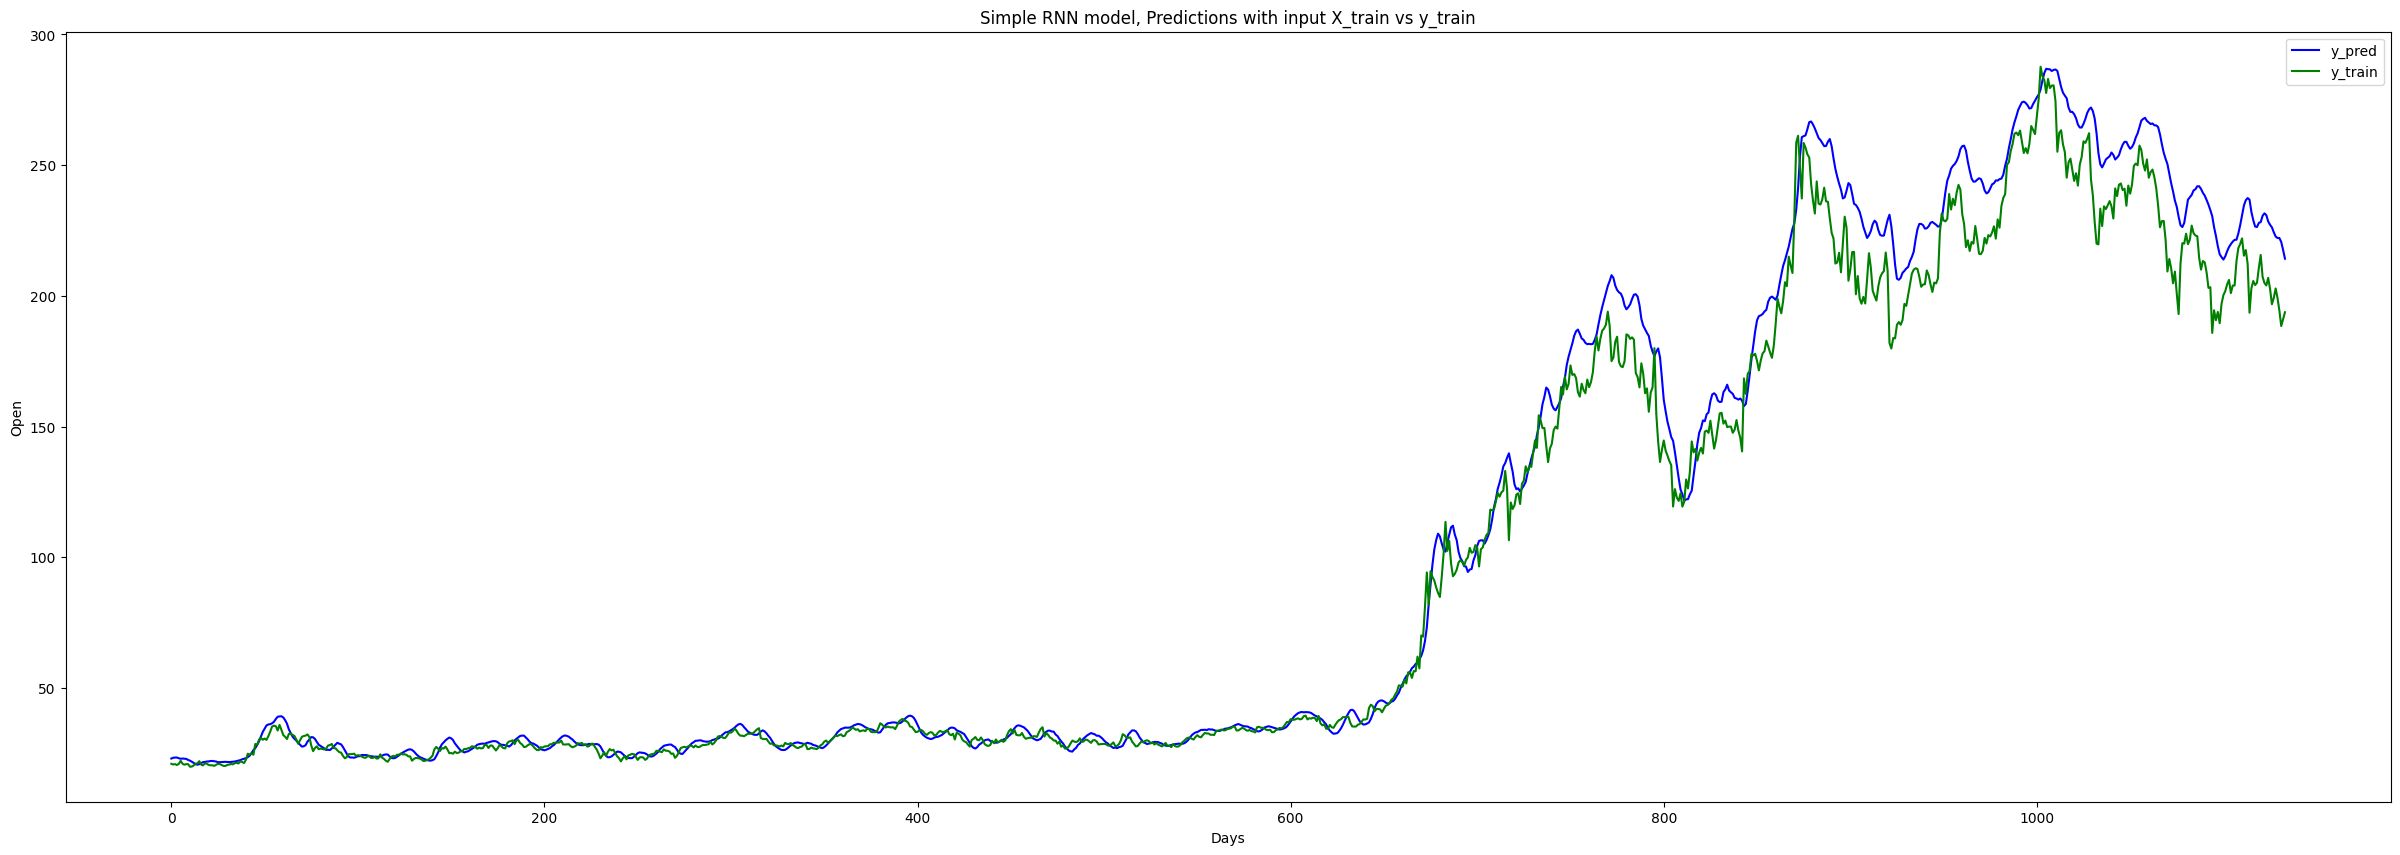

In [22]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()
plt.show()

In [23]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Shape of scaled validation dataset : (508, 1)


In [24]:
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


In [25]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Shape of y_pred_of_test : (458, 1)


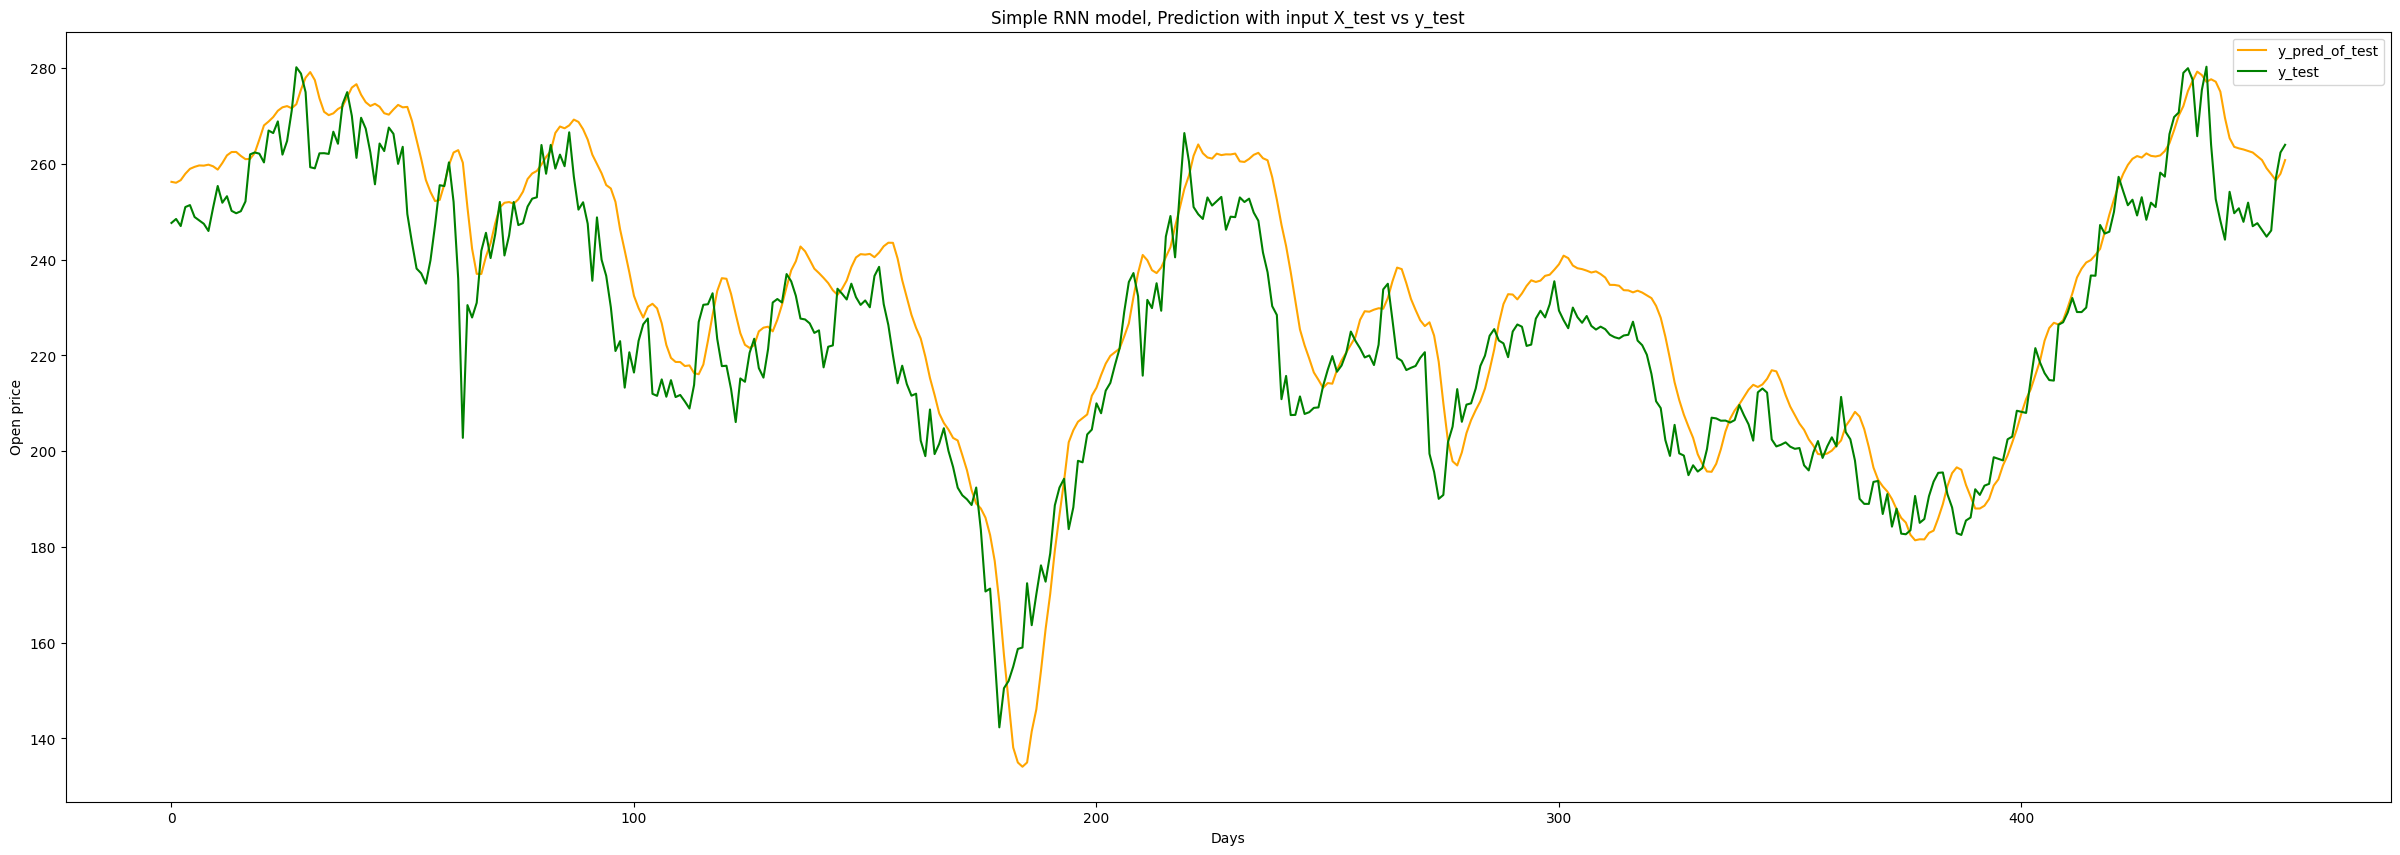

In [26]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()


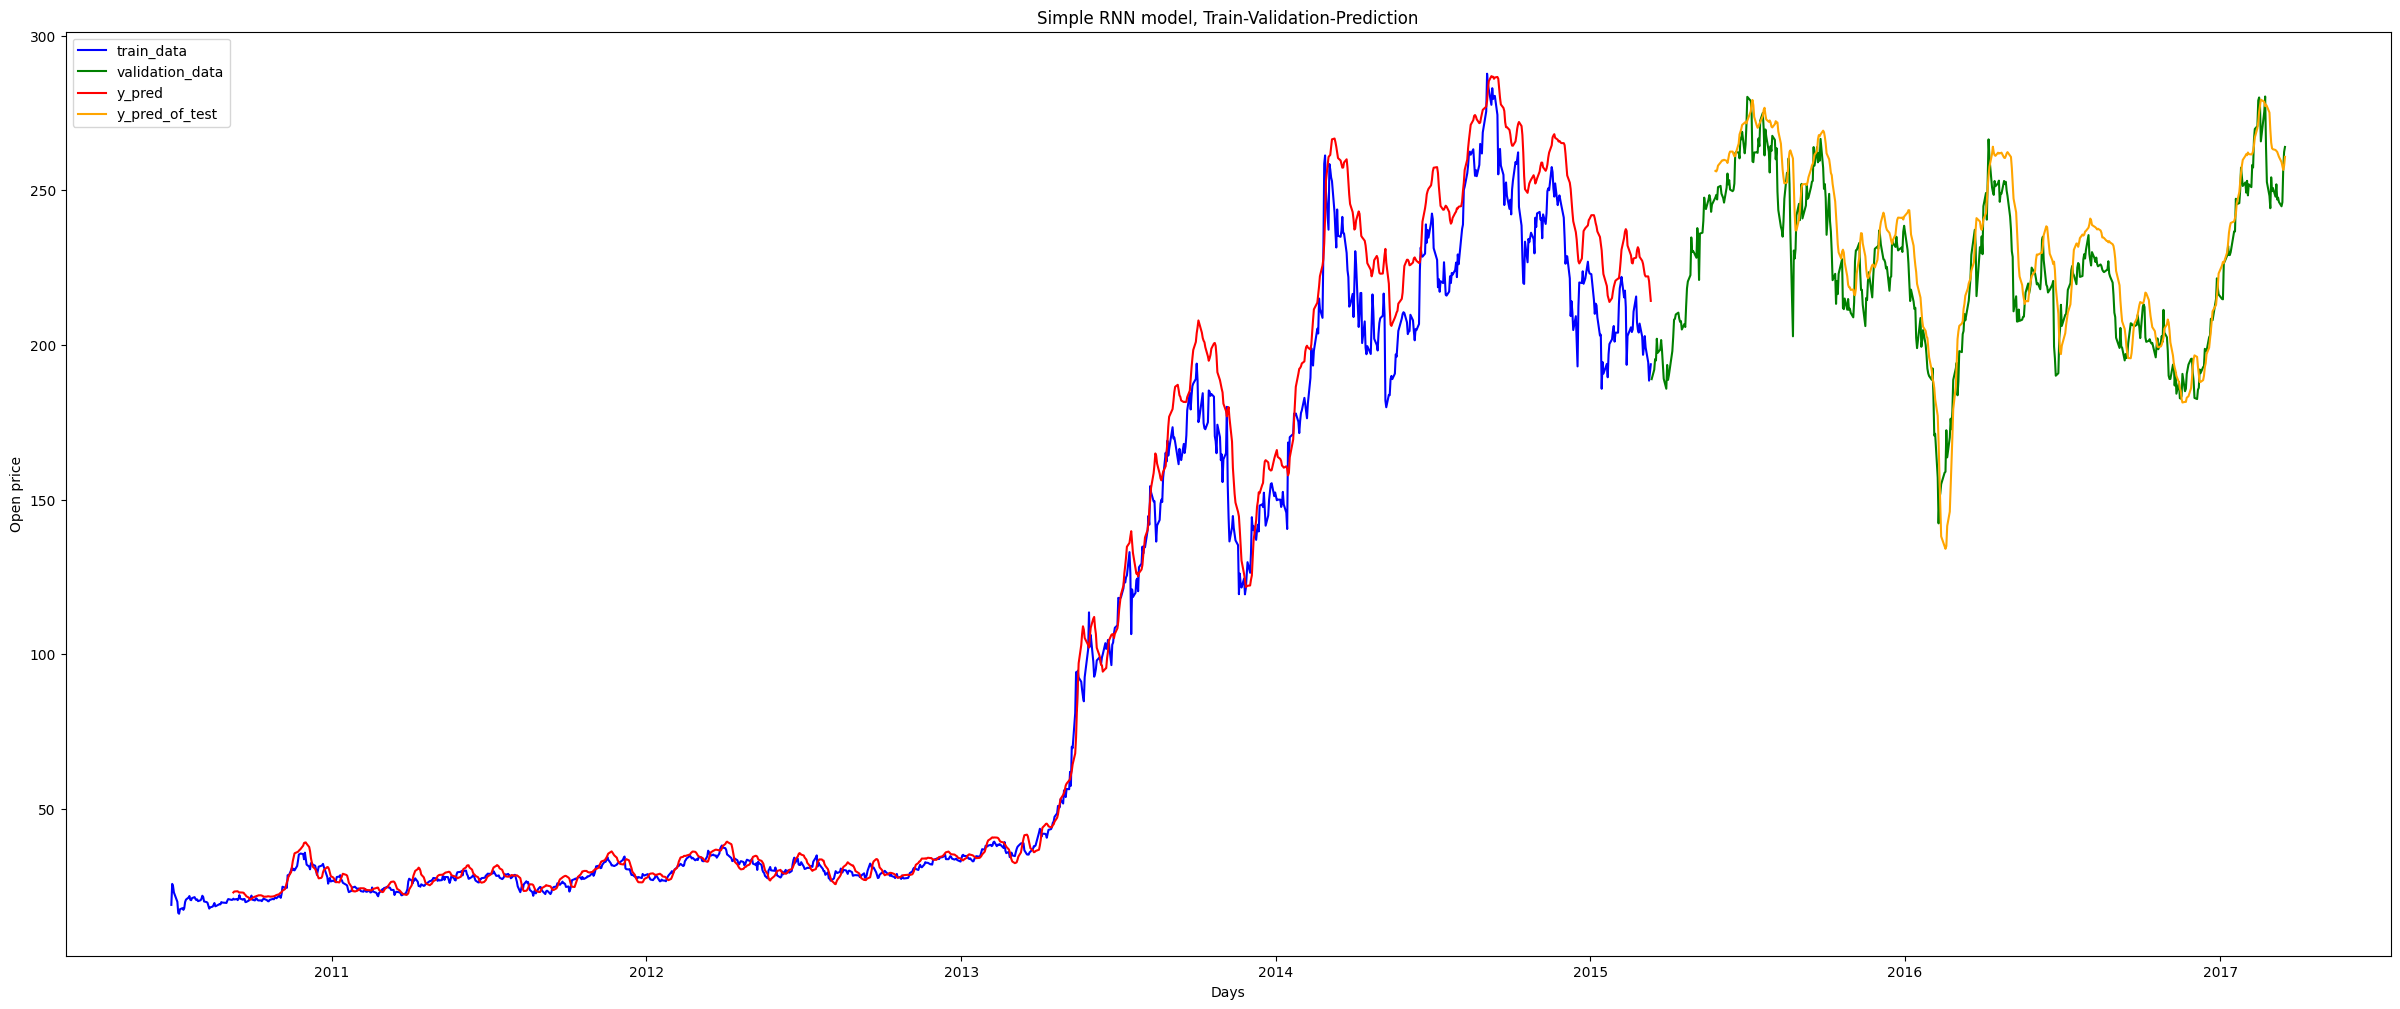

In [27]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [28]:
y_train = scaler.fit_transform(y_train)
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.0032 - loss: 0.0190
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 5.6932e-04 - loss: 0.0010
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.0016 - loss: 0.0011
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.0057 - loss: 0.0011
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 2.2636e-04 - loss: 0.0010
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.0024 - loss: 8.6436e-04
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 6.0106e-04 - loss: 6.1420e-04
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0011 - loss: 6.2680e-04
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 9.5131e-04 - loss: 7.2761e-04
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.0012 - loss: 6.2248e-04


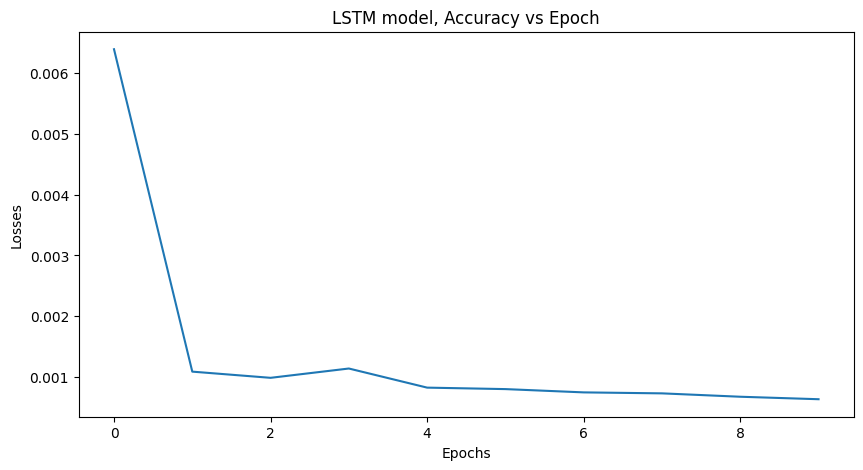

In [29]:
#lstm model
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


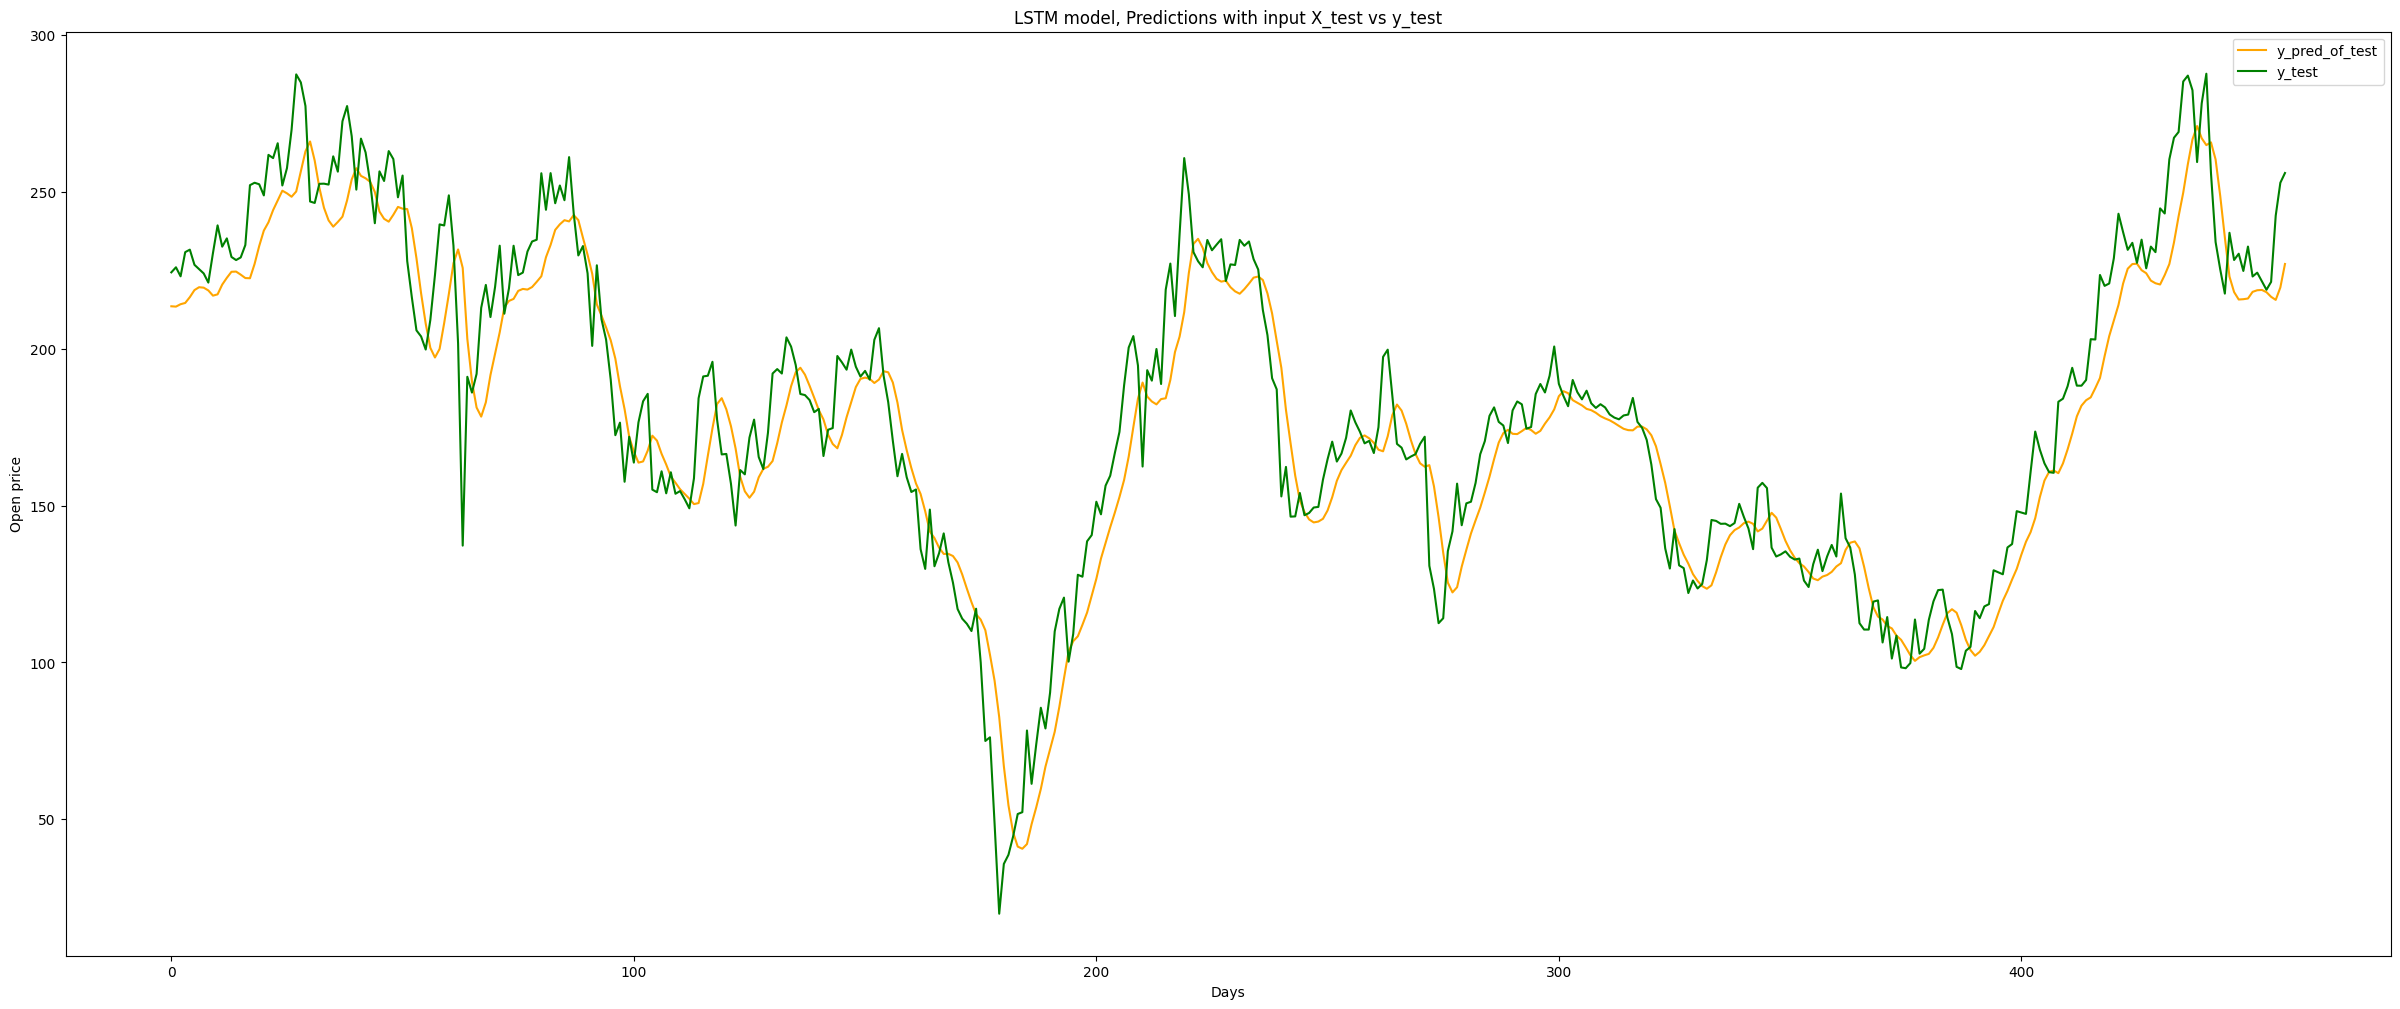

In [30]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [31]:
#Future price prediction¶
#Which day is the last day in our data?
data.iloc[-1]

,1691
Date,3/17/2017
Open,264.0
High,265.329987
Low,261.200012
Close,261.5
Volume,6475900
Adj Close,261.5


In [32]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.00946363],
        [0.04731867],
        [0.10354429],
        [0.04917441],
        [0.04898868],
        [0.06643166],
        [0.19075893],
        [0.18983106],
        [0.38652815],
        [0.35331247],
        [0.36054942],
        [0.43755803],
        [0.57320468],
        [0.5171645 ],
        [0.46316584],
        [0.48450549],
        [0.42345532],
        [0.49415485],
        [0.40675446],
        [0.47300067],
        [0.45611434],
        [0.58953431],
        [0.57394708],
        [0.7390982 ],
        [0.80478773],
        [0.82241588],
        [0.97624793],
        [0.99424758],
        [0.94971253],
        [0.73074763],
        [0.90981655],
        [1.        ],
        [0.69734648],
        [0.48691791],
        [0.40359993],
        [0.32974585],
        [0.51512331],
        [0.43217682],
        [0.45128979],
        [0.39877539],
        [0.47318612],
        [0.38188907],
        [0.39357964],
        [0.36722971],
        [0

In [33]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 4/28/2025      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 4/29/2025 :", LSTM_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Simple RNN, Open price prediction for 4/28/2025      : 253.86002
LSTM prediction, Open price prediction for 4/29/2025 : 255.78763
